In [1]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pathlib
from sklearn.model_selection import train_test_split 

In [13]:
#associa todas as imagens do path a variavel 'image_dataset_train', já convertendo para o tamanho q será utilizado
def open_img():
    data_train = []
    j = 0
    #criando o dataset
    for i in glob.glob(r'**/*.png', recursive=True):
        if(j<1040):
            data_train.append(cv2.imread(i))
            j = j + 1
    data_train = np.stack(data_train)
    #Normaliza os pixels do dataset para 0-1 e para o tipo float32
    data_train = np.float32(data_train)
    out = np.zeros(data_train.shape, np.float32)
    image_dataset_train = cv2.normalize(data_train, out, 1.0, 0.0, cv2.NORM_MINMAX)  
    return image_dataset_train
image_dataset_train = open_img()

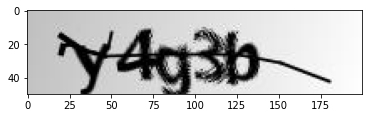

In [21]:
plt.imshow(image_dataset_train[1000])

In [105]:
nomes_imagens = list(pathlib.Path(r"C:\Users\STEFA\Desktop\captcha\archive\samples\samples").glob(r"**/*.png"))

In [107]:
def label_dataset():
    label = []
    for j in range(len(nomes_imagens)):
        labelaux1, labelaux2 = 0,""
        labelaux1 = str(nomes_imagens[j])

        labelaux1 = labelaux1.split('\samples')[2]
        i = 0
        while(i<6):
            if(i!=0):
                labelaux2 = labelaux2 + labelaux1[i]
            i = i + 1
        label.append(labelaux2)
    
    return label
label = label_dataset()
len(label)


1040

In [116]:
#divide o dataset em 70% treinamento, 20% teste e 10% validação
dataset_image = image_dataset_train
dataset_label = label
def teste1():
    data_train, data_test, label_train, label_test = train_test_split(dataset_image,dataset_label, test_size=0.2, train_size=0.8 )
    data_train, data_valid, label_train, label_valid = train_test_split(data_train,label_train, test_size=0.25, train_size=0.75 )
    return data_train, data_test, data_valid, label_train, label_test, label_valid

In [117]:
data_train, data_test, data_valid, label_train, label_test, label_valid = teste1()

In [118]:
len(dataset_image)

1040

In [119]:
len(label_train)

624

In [120]:
np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\datatrain.npy", data_train)
np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\datatest.npy", data_test)
np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\datavalid.npy", data_valid)

np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\labeltrain.npy", label_train)
np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\labeltest.npy", label_test)
np.save(r"C:\Users\STEFA\Desktop\captcha\dataset\labelvalid.npy", label_valid)